In [1]:
from __future__ import print_function, division
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession

In [2]:
# 启动 Spark （如果你已经启动就不需要）
spark = SparkSession.builder.master("local[2]") \
   .appName("test") \
   .enableHiveSupport() \
   .getOrCreate()

sc = spark.sparkContext

In [3]:
from pyspark.mllib.stat import Statistics
from pyspark.mllib.linalg import Vectors
import numpy as np

In [4]:
data = spark.read.csv("../data/ratings.csv", header= True)

In [5]:
sample_data = data.sample(False, 0.001, 1)

In [16]:
sample_data

DataFrame[userId: string, movieId: string, rating: string, timestamp: string]

In [6]:
sample_data.count()

19976

In [7]:
dense_data = sample_data.rdd.map(lambda x: Vectors.dense(x))

In [8]:
dense_data.take(5)

[DenseVector([1.0, 541.0, 4.0, 1112484603.0]),
 DenseVector([16.0, 2470.0, 4.0, 990970042.0]),
 DenseVector([17.0, 6.0, 4.0, 978765863.0]),
 DenseVector([23.0, 25.0, 4.0, 914458070.0]),
 DenseVector([54.0, 356.0, 5.0, 974840565.0])]

In [10]:
#http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#module-pyspark.mllib.stat
summary = Statistics.colStats(dense_data)


In [18]:
summary.max()[2]

5.0

In [19]:
print("Duration Statistics:")
print(" Mean: {}".format(round(summary.mean()[2],3)))
print(" St. deviation: {}".format(round(np.sqrt(summary.variance()[2]),3)))
print(" Max value: {}".format(round(summary.max()[2],3)))
print(" Min value: {}".format(round(summary.min()[2],3)))
print(" Total value count: {}".format(summary.count()))
print(" Number of non-zero values: {}".format(summary.numNonzeros()[2]))

Duration Statistics:
 Mean: 3.532
 St. deviation: 1.049
 Max value: 5.0
 Min value: 0.5
 Total value count: 19976
 Number of non-zero values: 19976.0


In [20]:
import pandas as pd
import seaborn as sns
sample_data_pd = sample_data.toPandas()

In [22]:
sample_data_pd.head()

,userId,movieId,rating,timestamp
0,1,541,4.0,1112484603
1,16,2470,4.0,990970042
2,17,6,4.0,978765863
3,23,25,4.0,914458070
4,54,356,5.0,974840565


In [23]:
type(sample_data_pd)

pandas.core.frame.DataFrame

In [24]:
sample_data_pd.dtypes

userId       object
movieId      object
rating       object
timestamp    object
dtype: object

In [25]:
%matplotlib inline

/Users/bryan.yang/Documents/workspace/hellobi/spark_course/pyspark/example/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


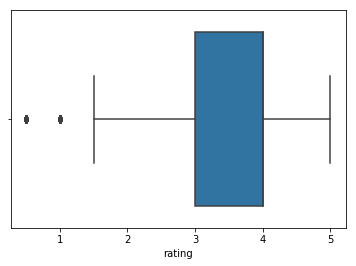

In [26]:
sns.boxplot(x=sample_data_pd['rating'].convert_objects(convert_numeric=True))

/Users/bryan.yang/Documents/workspace/hellobi/spark_course/pyspark/example/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


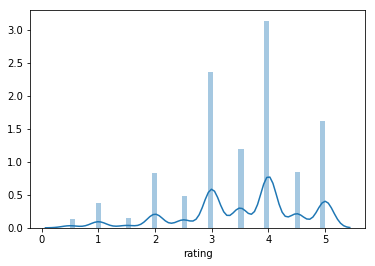

In [27]:
sns.distplot(sample_data_pd['rating'].convert_objects(convert_numeric=True))

In [28]:
means = []

for i in range(100):
    mean = sample_data_pd['rating'].sample(frac=0.1).convert_objects(convert_numeric=True).mean(axis=0)
    means.append(mean)

/Users/bryan.yang/Documents/workspace/hellobi/spark_course/pyspark/example/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [29]:
means[:10]

[3.5417917917917916,
 3.5180180180180178,
 3.5182682682682684,
 3.5252752752752752,
 3.5330330330330328,
 3.5510510510510511,
 3.5610610610610611,
 3.5055055055055053,
 3.5060060060060061,
 3.535035035035035]

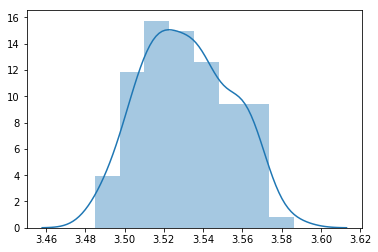

In [30]:
sns.distplot(means)

In [ ]:
spark.stop()